In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# All library importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load dataset
df = pd.read_csv("preprocessed_crime_data.csv")

# Convert date column to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y')
# REF_DATE as index
df.set_index('REF_DATE', inplace=True)

# Selecting target variable Actual_incidents and relevant features
target = 'Actual_incidents'
features = ['Rate_per_100000_population', 'Cleared_by_charge','Cleared_otherwise','Percentage_contribution_to_the_Crime_Severity_Index_(CSI)','Rate_adult_charged_per_100000_population_aged_18_years_and_over','Rate_total_persons_charged_per_100000_population_aged_12_years_and_over','Rate_youth_charged_per_100000_population_aged_12_to_17_years','Rate_youth_not_charged_per_100000_population_aged_12_to_17_years','Total_cleared','Total_adult_charged','Total_persons_charged','Total_youth_charged','Total_youth_not_charged']

# Train-test split with 1998-2018 in training data and 2019-2023 in testing data
train = df['1998-01-01' : '2018-12-31']
test = df['2019-01-01' : '2023-12-31']


# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(train[features])
X_test = scaler.transform(test[features])
y_train = train[target].values
y_test = test[target].values
print(f"Training dataset : {X_train.shape}, {len(X_train)/len(df)*100:.2f}%")
print(f"Testing dataset : {X_test.shape}, {len(X_test)/len(df)*100:.2f}%")

Training dataset : (224090, 13), 73.10%
Testing dataset : (82460, 13), 26.90%


In [3]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Random Forest Performance:
MAE: 481.753
MSE: 77898177.044
RMSE: 8825.994
R² Score: 0.942
Approximate Accuracy: 77.15%



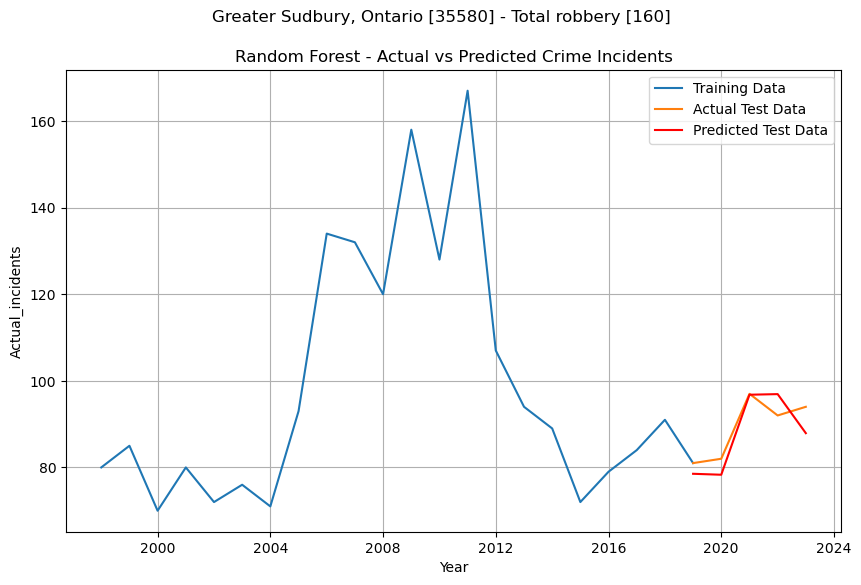

In [4]:
# Function to evaluate models and plot results

Place = 'Greater Sudbury, Ontario [35580]'
Vio = 'Total robbery [160]'

# Filter example_series to plot the graph with small data and prediciting on it
example_df = df[(df['GEO'] == Place)& (df['Violations'] == Vio)][['Actual_incidents']]
example_df2 = df[(df['GEO'] == Place)& (df['Violations'] == Vio)][['Rate_per_100000_population', 'Cleared_by_charge','Cleared_otherwise','Percentage_contribution_to_the_Crime_Severity_Index_(CSI)','Rate_adult_charged_per_100000_population_aged_18_years_and_over','Rate_total_persons_charged_per_100000_population_aged_12_years_and_over','Rate_youth_charged_per_100000_population_aged_12_to_17_years','Rate_youth_not_charged_per_100000_population_aged_12_to_17_years','Total_cleared','Total_adult_charged','Total_persons_charged','Total_youth_charged','Total_youth_not_charged']]

# Extract train and test again for graph visualizations
y_train3 = example_df['1998-01-01' : '2019-12-31']
y_test3 = example_df['2019-01-01' : '2023-12-31']
y_test4 = example_df2['2019-01-01' : '2023-12-31']
X_test3 = scaler.transform(y_test4)


def evaluate_model(model, X_test, y_test, model_name, X_test3):
    y_pred = model.predict(X_test)
    y_pred3 = model.predict(X_test3)
    # print(y_pred3)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = 100 - (mae / np.mean(y_test) * 100)


    # Approximate accuracy calculation

    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    print(f"Approximate Accuracy: {accuracy:.2f}%\n")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_train3, label='Training Data')
    plt.plot(y_test3, label='Actual Test Data')
    plt.plot(y_test3.index, y_pred3, label='Predicted Test Data', color='red')
    plt.title(f'{model_name} - Actual vs Predicted Crime Incidents')
    plt.suptitle(f'{Place} - {Vio}')
    plt.xlabel('Year')
    plt.ylabel('Actual_incidents')
    plt.legend()
    plt.grid(True)
    plt.show()


# Evaluate models and generate plots
evaluate_model(rf_model, X_test, y_test, "Random Forest", X_test3)